In [1]:
from ipynb.fs.defs.bbc_gpt2_all import gpt2
from ipynb.fs.defs.bbc_bert1_all import bert
from ipynb.fs.defs.bbc_bart1_all import bart
from ipynb.fs.defs.multiple import cosine_similarity
from ipynb.fs.defs.multiple import jaccard_similarity
from ipynb.fs.defs.multiple import get_processed_text
from ipynb.fs.defs.speech_to_text import get_text

In [2]:
import rouge

In [3]:
import sklearn.metrics as metric
def get_score(all_hypothesis, all_references):
    apply_avg = 'Avg'
    evaluator = rouge.Rouge(metrics=['rouge-n', 'rouge-l', 'rouge-w'],
                               max_n=4,
                               limit_length=True,
                               length_limit=100,
                               length_limit_type='words',
                               apply_avg=apply_avg,
                               alpha=0.5, # Default F1_score
                               weight_factor=1.2,
                               stemming=True)
    scores = evaluator.get_scores(all_hypothesis, all_references)
    for key,value in scores.items():
        print(key.upper()+'\n')
        print("F: "+str(value['f'])+"  R: "+str(value['r'])+"  P: "+str(value['p'])+"\n")
    return scores

In [4]:
def evaluate_models():
    my_summaries=[]
    bert_summaries=[]
    bart_summaries=[]
    gpt2_summaries=[]
    for i in range(1,6):
        
        m1 = open("/Users/shreyabanerjee/Summarizer/multiple_docs/human_written_summary/"+str(i)+str(i)+".txt","r")
        summary=m1.read()
        my_summaries.append(summary)
        print("\nHuman written summary \n",summary)
        
        path="/Users/shreyabanerjee/Summarizer/multiple_docs/news/Topic"+str(i)
        
        text=get_processed_text(path,cosine_similarity)
        
        print("\nSummarizing articles from Topic "+str(i)+" using BERT model\n")
        s1=bert(text)
        bert_summaries.append(s1)
        print("BERT summary\n",s1)
        #print("Score for BERT summary",get_score(bert_summary,my_summary))
        
        print("\nSummarizing articles from Topic "+str(i)+" using BART model\n")
        s2=bart(text)
        bart_summaries.append(s2)
        print("BART summary\n",s2)
        #print("Score for BART summary",get_score(bart_summary,my_summary)) 
        
        print("\nSummarizing articles from Topic "+str(i)+" using GPT2 model\n")
        s3=gpt2(text)
        gpt2_summaries.append(s3)
        print("GPT2 summary\n",s3)
        #print("Score for GPT2 summary",get_score(gpt2_summary,my_summary)) 
        
    print("Score for BERT summary")
    results_bert=get_score(bert_summaries,my_summaries)
    print("Score for BART summary")
    results_bart=get_score(bart_summaries,my_summaries)
    print("Score for GPT2 summary")
    results_gpt2=get_score(gpt2_summaries,my_summaries)
    return results_bert,results_bart,results_gpt2

In [5]:
results_bert,results_bart,results_gpt2=evaluate_models()


Human written summary 
 A Bengaluru based model and makeup artist had accused Zomato delivery guy of attacking her for his service was booked by the police on Monday.An FIR was also registered againast Hitesha Chandranee  under a number of sections namely 341 (wrongful restraint), 355(assault or criminal force), 504 (intentional insult), and 506 (criminal intimidation) of the IPC as put out by News18.The Electronic City police arrested him and released him on bail.Kamaraj, who worked with Zomato for three years confronted Hitesha’s allegation,that she abused him in filthy language and threw slippers at him. He also claimed that she injured herself on her nose from her finger ring in the process of assaulting him and she posted her bleeding node video on Twitter.The roads he took to deliver food were under construction and had over 10 blockades.Kamraj said after he apologised for the late delivery,the woman did not stop to abuse him and asked him to take the food back.The model said in

Some weights of GPT2Model were not initialized from the model checkpoint at gpt2-medium and are newly initialized: ['h.0.attn.masked_bias', 'h.1.attn.masked_bias', 'h.2.attn.masked_bias', 'h.3.attn.masked_bias', 'h.4.attn.masked_bias', 'h.5.attn.masked_bias', 'h.6.attn.masked_bias', 'h.7.attn.masked_bias', 'h.8.attn.masked_bias', 'h.9.attn.masked_bias', 'h.10.attn.masked_bias', 'h.11.attn.masked_bias', 'h.12.attn.masked_bias', 'h.13.attn.masked_bias', 'h.14.attn.masked_bias', 'h.15.attn.masked_bias', 'h.16.attn.masked_bias', 'h.17.attn.masked_bias', 'h.18.attn.masked_bias', 'h.19.attn.masked_bias', 'h.20.attn.masked_bias', 'h.21.attn.masked_bias', 'h.22.attn.masked_bias', 'h.23.attn.masked_bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


GPT2 summary
 A Bengaluru-based model and makeup artist, who accused Zomato's delivery man of attacking her over alleged delayed service, was booked by the police on Monday. Kamaraj, who had worked with Zomato for three years, countered Hitesha’s allegation, stating she abused him in filthy language and hurled slippers at him. He further said she injured herself on her nose from her finger ring in the process of assaulting him. “While I apologised, the woman continued to hurl abuses and asked me to carry back the food. This is inhuman, shameful and heart-breaking.

Human written summary 
 Ariz Khan was convicted for murder of Delhi Police Inspector Mohan Chand Sharma in 2008 Batla House encounter between the police and alleged terrorists in Jamia Nagar in south Delhi following serial bomb blasts in the national capital in which 39 people died and 159 were injured.The additional sessions judge Sandepp Yadav imposed death penalty on Ariz Khan,one of the convicts after considering the nat

Some weights of GPT2Model were not initialized from the model checkpoint at gpt2-medium and are newly initialized: ['h.0.attn.masked_bias', 'h.1.attn.masked_bias', 'h.2.attn.masked_bias', 'h.3.attn.masked_bias', 'h.4.attn.masked_bias', 'h.5.attn.masked_bias', 'h.6.attn.masked_bias', 'h.7.attn.masked_bias', 'h.8.attn.masked_bias', 'h.9.attn.masked_bias', 'h.10.attn.masked_bias', 'h.11.attn.masked_bias', 'h.12.attn.masked_bias', 'h.13.attn.masked_bias', 'h.14.attn.masked_bias', 'h.15.attn.masked_bias', 'h.16.attn.masked_bias', 'h.17.attn.masked_bias', 'h.18.attn.masked_bias', 'h.19.attn.masked_bias', 'h.20.attn.masked_bias', 'h.21.attn.masked_bias', 'h.22.attn.masked_bias', 'h.23.attn.masked_bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


GPT2 summary
 A Delhi court Monday awarded death penalty to Ariz Khan for the murder of police inspector Mohan Chand Sharma in the 2008 Batla House encounter case. The trial court had sentenced Indian Mujahideen terrorist Shahzad Ahmed in July 2013 to life imprisonment in connection with the case. Ariz Khan had fled from the spot and was declared proclaimed offender. Hence, I am referring the matter to Delhi Legal Services Authority for award of additional compensation,” the judge further said. “Ariz along with others was carrying deadly weapons which clearly suggests that they were ready to kill anybody in any eventuality. He added that widespread concerns were raised after the incident regarding the safety of police officers and it instilled fear in the minds of the common people.dvocate M S Khan, appearing for Ariz, opposed the death penalty and said the incident was not premeditated.

Human written summary 
 Europe is experiencing heat wave and draughts in last seven years,which is

Some weights of GPT2Model were not initialized from the model checkpoint at gpt2-medium and are newly initialized: ['h.0.attn.masked_bias', 'h.1.attn.masked_bias', 'h.2.attn.masked_bias', 'h.3.attn.masked_bias', 'h.4.attn.masked_bias', 'h.5.attn.masked_bias', 'h.6.attn.masked_bias', 'h.7.attn.masked_bias', 'h.8.attn.masked_bias', 'h.9.attn.masked_bias', 'h.10.attn.masked_bias', 'h.11.attn.masked_bias', 'h.12.attn.masked_bias', 'h.13.attn.masked_bias', 'h.14.attn.masked_bias', 'h.15.attn.masked_bias', 'h.16.attn.masked_bias', 'h.17.attn.masked_bias', 'h.18.attn.masked_bias', 'h.19.attn.masked_bias', 'h.20.attn.masked_bias', 'h.21.attn.masked_bias', 'h.22.attn.masked_bias', 'h.23.attn.masked_bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


GPT2 summary
 Heatwaves and droughts that have plagued Europe in the last seven years constitute the most extreme weather-related events in the region for over 2,000 years, a research posits. To ascertain this, the researchers analysed tree rings dating back to Roman rings, but attributing the extreme changes to global warming. The study was published in the journal nature Geoscience and analysed 27,000 growth rings from 147 oak trees. Based on this, they determined temperatures from wood density and width. The reconstruction showed an overall drying trend. But the samples showed that the droughts from 2015-2018 were "unprecedented" over the massive time span. We're all aware of the cluster of exceptionally hot and dry summers we've had over the past few years, but we needed precise reconstructions of historical conditions to see how these recent extremes compare to previous years," said Ulf Büntgen, professor in Cambridge's Department of Geography and a lead author of the report, in a

Some weights of GPT2Model were not initialized from the model checkpoint at gpt2-medium and are newly initialized: ['h.0.attn.masked_bias', 'h.1.attn.masked_bias', 'h.2.attn.masked_bias', 'h.3.attn.masked_bias', 'h.4.attn.masked_bias', 'h.5.attn.masked_bias', 'h.6.attn.masked_bias', 'h.7.attn.masked_bias', 'h.8.attn.masked_bias', 'h.9.attn.masked_bias', 'h.10.attn.masked_bias', 'h.11.attn.masked_bias', 'h.12.attn.masked_bias', 'h.13.attn.masked_bias', 'h.14.attn.masked_bias', 'h.15.attn.masked_bias', 'h.16.attn.masked_bias', 'h.17.attn.masked_bias', 'h.18.attn.masked_bias', 'h.19.attn.masked_bias', 'h.20.attn.masked_bias', 'h.21.attn.masked_bias', 'h.22.attn.masked_bias', 'h.23.attn.masked_bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


GPT2 summary
 A BJP MP from Himachal Pradesh, Ram Swaroop Sharma, was found dead at his residence in Delhi today, the police said, adding they are investigating whether it was a case of suicide. "He was found hanging inside his room, which was locked from inside. No suicide note has been found," the police said. The parliamentarian was reportedly unwell for the past few months. Himachal Pradesh Chief Minister Jairam Thakur remembered Mr Sharma as a dedicated party worker. We used his work as an example for party workers. We're extremely saddened, hope his soul rests in peace. Meanwhile, after the death of the BJP MP, the meeting of the BJP parliamentary party to be held today has been cancelled.. He breathed his last at Ram Manohar Lohia Hospital in Delhi. His body was brought back to the Gomti apartment after the post-mortem.

Human written summary 
 A group of 40 Banaras Hindu University students had staged a demonstration against the appointment of Nita Ambani of Reliance Industries

Some weights of GPT2Model were not initialized from the model checkpoint at gpt2-medium and are newly initialized: ['h.0.attn.masked_bias', 'h.1.attn.masked_bias', 'h.2.attn.masked_bias', 'h.3.attn.masked_bias', 'h.4.attn.masked_bias', 'h.5.attn.masked_bias', 'h.6.attn.masked_bias', 'h.7.attn.masked_bias', 'h.8.attn.masked_bias', 'h.9.attn.masked_bias', 'h.10.attn.masked_bias', 'h.11.attn.masked_bias', 'h.12.attn.masked_bias', 'h.13.attn.masked_bias', 'h.14.attn.masked_bias', 'h.15.attn.masked_bias', 'h.16.attn.masked_bias', 'h.17.attn.masked_bias', 'h.18.attn.masked_bias', 'h.19.attn.masked_bias', 'h.20.attn.masked_bias', 'h.21.attn.masked_bias', 'h.22.attn.masked_bias', 'h.23.attn.masked_bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


GPT2 summary
 The proposal of Banaras Hindu University (BHU) to appoint Nita Ambani, the wife of billionaire industrialist Mukesh Ambani, as a visiting professor is being opposed by students who see it as a “wrong example” being set by the university. “We do academic and research work related to women empowerment, along with graduation and post-graduation courses. According to him, Vice-Chancellor Bhatnagar told them that he had no information about the proposal being sent to Nita Ambani.. A group of students in BHU protested against the proposal to make Reliance Foundation chairperson Nita Ambani a visiting professor at BHU by sieging the vice-chancellor residence. Students say that being the wife of a bourgeoisie can not be a measure of women empowerment. The top officials of the University, including the Dean of the Faculty of Social Sciences, came to the protest site to placate the students. In a bid to convince the students, the dean said that no such decision has been finalised y

In [6]:
print(results_bart)

{'rouge-2': {'f': 0.18891518379804256, 'p': 0.20262486548368136, 'r': 0.17737862506460642}, 'rouge-3': {'f': 0.11274547393745156, 'p': 0.12175027859069561, 'r': 0.1051847233292122}, 'rouge-1': {'f': 0.4526608727400931, 'p': 0.47970823009232977, 'r': 0.429823164429832}, 'rouge-4': {'f': 0.07824114904391004, 'p': 0.08483326425382318, 'r': 0.07272247586749625}, 'rouge-l': {'f': 0.3372140685507251, 'p': 0.35418969690493557, 'r': 0.3225023249188969}, 'rouge-w': {'f': 0.11030363366310084, 'p': 0.21226725935784763, 'r': 0.07464901845341113}}


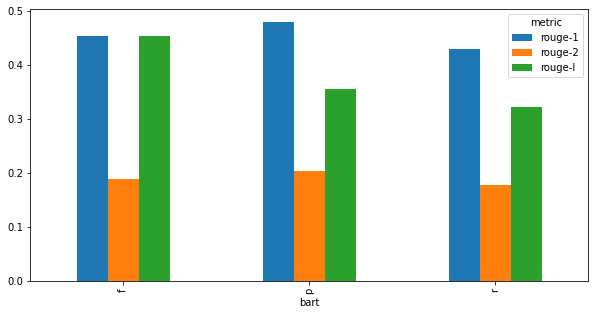

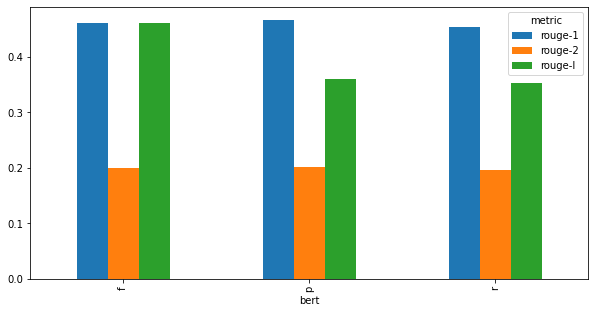

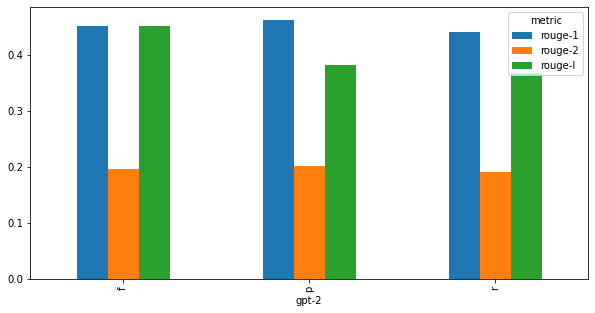

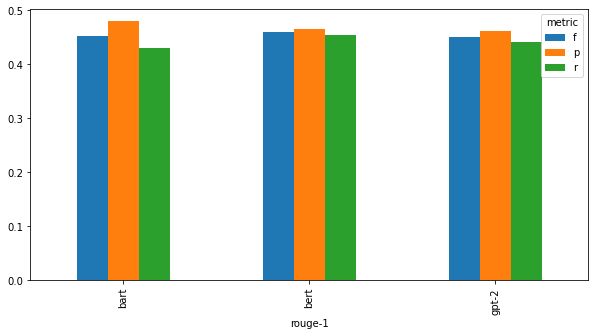

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


#bart results
df1 = pd.DataFrame([['p','rouge-1',results_bart['rouge-1']['p']],['p','rouge-2',results_bart['rouge-2']['p']],['p','rouge-l',results_bart['rouge-l']['p']],['r','rouge-1',results_bart['rouge-1']['r']],
                   ['r','rouge-2',results_bart['rouge-2']['r']],['r','rouge-l',results_bart['rouge-l']['r']],['f','rouge-1',results_bart['rouge-1']['f']],['f','rouge-2',results_bart['rouge-2']['f']],['f','rouge-l',results_bart['rouge-1']['f']]],columns=['bart','metric','val'])
#bert results
df2 = pd.DataFrame([['p','rouge-1',results_bert['rouge-1']['p']],['p','rouge-2',results_bert['rouge-2']['p']],['p','rouge-l',results_bert['rouge-l']['p']],['r','rouge-1',results_bert['rouge-1']['r']],
                   ['r','rouge-2',results_bert['rouge-2']['r']],['r','rouge-l',results_bert['rouge-l']['r']],['f','rouge-1',results_bert['rouge-1']['f']],['f','rouge-2',results_bert['rouge-2']['f']],['f','rouge-l',results_bert['rouge-1']['f']]],columns=['bert','metric','val'])
#gpt-2 results
df3 = pd.DataFrame([['p','rouge-1',results_gpt2['rouge-1']['p']],['p','rouge-2',results_gpt2['rouge-2']['p']],['p','rouge-l',results_gpt2['rouge-l']['p']],['r','rouge-1',results_gpt2['rouge-1']['r']],
                   ['r','rouge-2',results_gpt2['rouge-2']['r']],['r','rouge-l',results_gpt2['rouge-l']['r']],['f','rouge-1',results_gpt2['rouge-1']['f']],['f','rouge-2',results_gpt2['rouge-2']['f']],['f','rouge-l',results_gpt2['rouge-1']['f']]],columns=['gpt-2','metric','val'])

#comparision of 3 methods based on results of rouge-1(or any variant)
df4 = pd.DataFrame([['bart','p',results_bart['rouge-1']['p']],['bart','r',results_bart['rouge-1']['r']],['bart','f',results_bart['rouge-1']['f']],
                    ['bert','p',results_bert['rouge-1']['p']],['bert','r',results_bert['rouge-1']['r']],['bert','f',results_bert['rouge-1']['f']],
                    ['gpt-2','p',results_gpt2['rouge-1']['p']],['gpt-2','r',results_gpt2['rouge-1']['r']],['gpt-2','f',results_gpt2['rouge-1']['f']]],columns=['rouge-1','metric','val'])

df1.pivot("bart", "metric", "val").plot(kind='bar',figsize=(10,5))
plt.show()

df2.pivot("bert", "metric", "val").plot(kind='bar',figsize=(10,5))
plt.show()

df3.pivot("gpt-2", "metric", "val").plot(kind='bar',figsize=(10,5))
plt.show()

df4.pivot("rouge-1", "metric", "val").plot(kind='bar',figsize=(10,5))
plt.show()